# ai_application
Classification of the MNIST handwritten digits data
### Imports and jupyter TensorBoard extension

In [1]:
# load TensorBoard
%load_ext tensorboard

# imports
import datetime
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.datasets.mnist import load_data
from ai_library import CustomData, NeuralNet, Visualisation

### Create a child class of *CustomData* to load MNIST

In [2]:
class MNISTdata(CustomData):
    def __init__(self):
        super(MNISTdata, self).__init__()

    def load_mnist(self):
        return load_data()

### Parameters for CNN fit

In [3]:
# parameters
EPOCHS = 30
BATCH_SIZE = 128

### Load MNIST handwritten digits dataset using the new class

In [4]:
# load MNIST data
data_gen = MNISTdata()
(x_train, y_train), (x_test, y_test) = data_gen.load_mnist()

### Let's take a look at the data
MNIST handwritten digits dataset contains images of the digits 0-9

rerun the code below to see a different sample

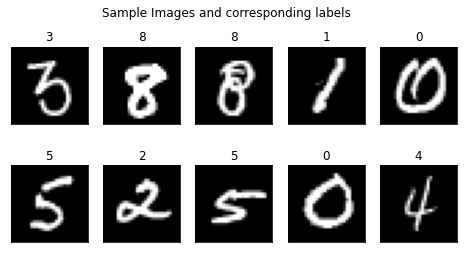

In [5]:
# show images
viz = Visualisation()
sample_img = viz.img_plot("Sample Images and corresponding labels", x_train, y_train)

### Preprocess data to feed into the model and store number of classes for classification
*preprocessing* reshapes the array, normalizes pixel values and turns string labels to integers (not necessary here)

In [6]:
# preprocessing
x_train, y_train, labels_train = data_gen.preprocessing(x_train, y_train)
x_test, y_test, labels_test = data_gen.preprocessing(x_test, y_test)

# number of classes
num_classes = len(labels_train)

### Initialize model and set callbacks

In [7]:
# initialize model
model = NeuralNet(num_classes)

# callbacks
# early stopping
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=2)
# tensorboard
log_dir = "results/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

callbacks = [early_stopping, tensorboard_cb]

### Train the model

In [8]:
# train model
history = model.comp_and_fit(x_train, y_train, EPOCHS, BATCH_SIZE, callbacks)

Epoch 1/30
375/375 - 39s - loss: 0.2464 - accuracy: 0.9211 - val_loss: 0.0511 - val_accuracy: 0.9856
Epoch 2/30
375/375 - 37s - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 3/30
375/375 - 37s - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0401 - val_accuracy: 0.9883
Epoch 4/30
375/375 - 37s - loss: 0.0323 - accuracy: 0.9893 - val_loss: 0.0301 - val_accuracy: 0.9909
Epoch 5/30
375/375 - 39s - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0298 - val_accuracy: 0.9911
Epoch 6/30
375/375 - 40s - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 7/30
375/375 - 39s - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0310 - val_accuracy: 0.9910


### Let's take a look at the loss and accuracy curves in TensorBoard

In [9]:
%tensorboard --logdir results/logs

Reusing TensorBoard on port 6006 (pid 17852), started 0:44:50 ago. (Use '!kill 17852' to kill it.)

Analogous to the custom data, the learning curves here show no signs of under or overfitting.

### Evaluate the model on the test data

In [10]:
# model evaluation
loss, accuracy = model.test_eval(x_test, y_test)
print("Accuracy:", round(accuracy * 100, 2), "%")

Accuracy: 99.21 %


The model is able to accurately predict on the test data

Again a look at the confusion matrix gives more insights on specific errors

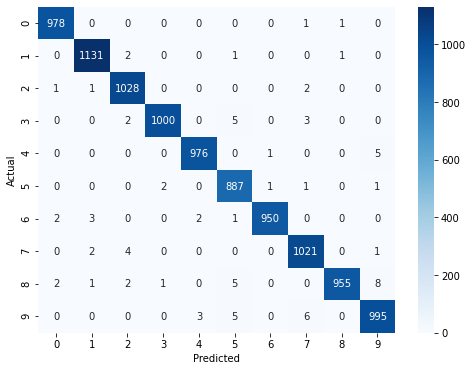

In [11]:
# predictions
y_preds = model.test_pred(x_test)
# confusion matrix
cm = viz.cm_plot(y_test, y_preds, labels_test)

#### Run the code below to see random image samples and the predicted labels

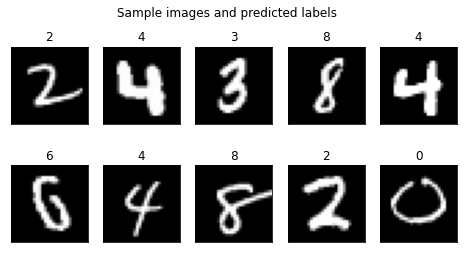

In [12]:
# plot images
sample_img_pred = viz.img_plot("Sample images and predicted labels", x_test, y_preds)